In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
concrete_data = pd.read_csv("/kaggle/input/regression-with-neural-networking/concrete_data.csv")

In [3]:
concrete_data_np = np.float32(concrete_data)
concrete_data = pd.DataFrame(concrete_data_np, columns = concrete_data.columns)
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float32
 1   Blast Furnace Slag  1030 non-null   float32
 2   Fly Ash             1030 non-null   float32
 3   Water               1030 non-null   float32
 4   Superplasticizer    1030 non-null   float32
 5   Coarse Aggregate    1030 non-null   float32
 6   Fine Aggregate      1030 non-null   float32
 7   Age                 1030 non-null   float32
 8   Strength            1030 non-null   float32
dtypes: float32(9)
memory usage: 36.3 KB


In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167877,73.895828,54.188351,181.567276,6.204660,972.918945,773.580444,45.662136,35.817963
std,104.506363,86.279343,63.997002,21.354218,5.973842,77.753960,80.175980,63.169910,16.705742
min,102.000000,0.000000,0.000000,121.800003,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.899994,0.000000,932.000000,730.950012,7.000000,23.710001
50%,272.899994,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445002
75%,350.000000,142.950001,118.300003,192.000000,10.200000,1029.400024,824.000000,56.000000,46.135000
max,540.000000,359.399994,200.100006,247.000000,32.200001,1145.000000,992.599976,365.000000,82.599998


array([[<Axes: title={'center': 'Cement'}>,
        <Axes: title={'center': 'Blast Furnace Slag'}>,
        <Axes: title={'center': 'Fly Ash'}>],
       [<Axes: title={'center': 'Water'}>,
        <Axes: title={'center': 'Superplasticizer'}>,
        <Axes: title={'center': 'Coarse Aggregate'}>],
       [<Axes: title={'center': 'Fine Aggregate'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Strength'}>]], dtype=object)

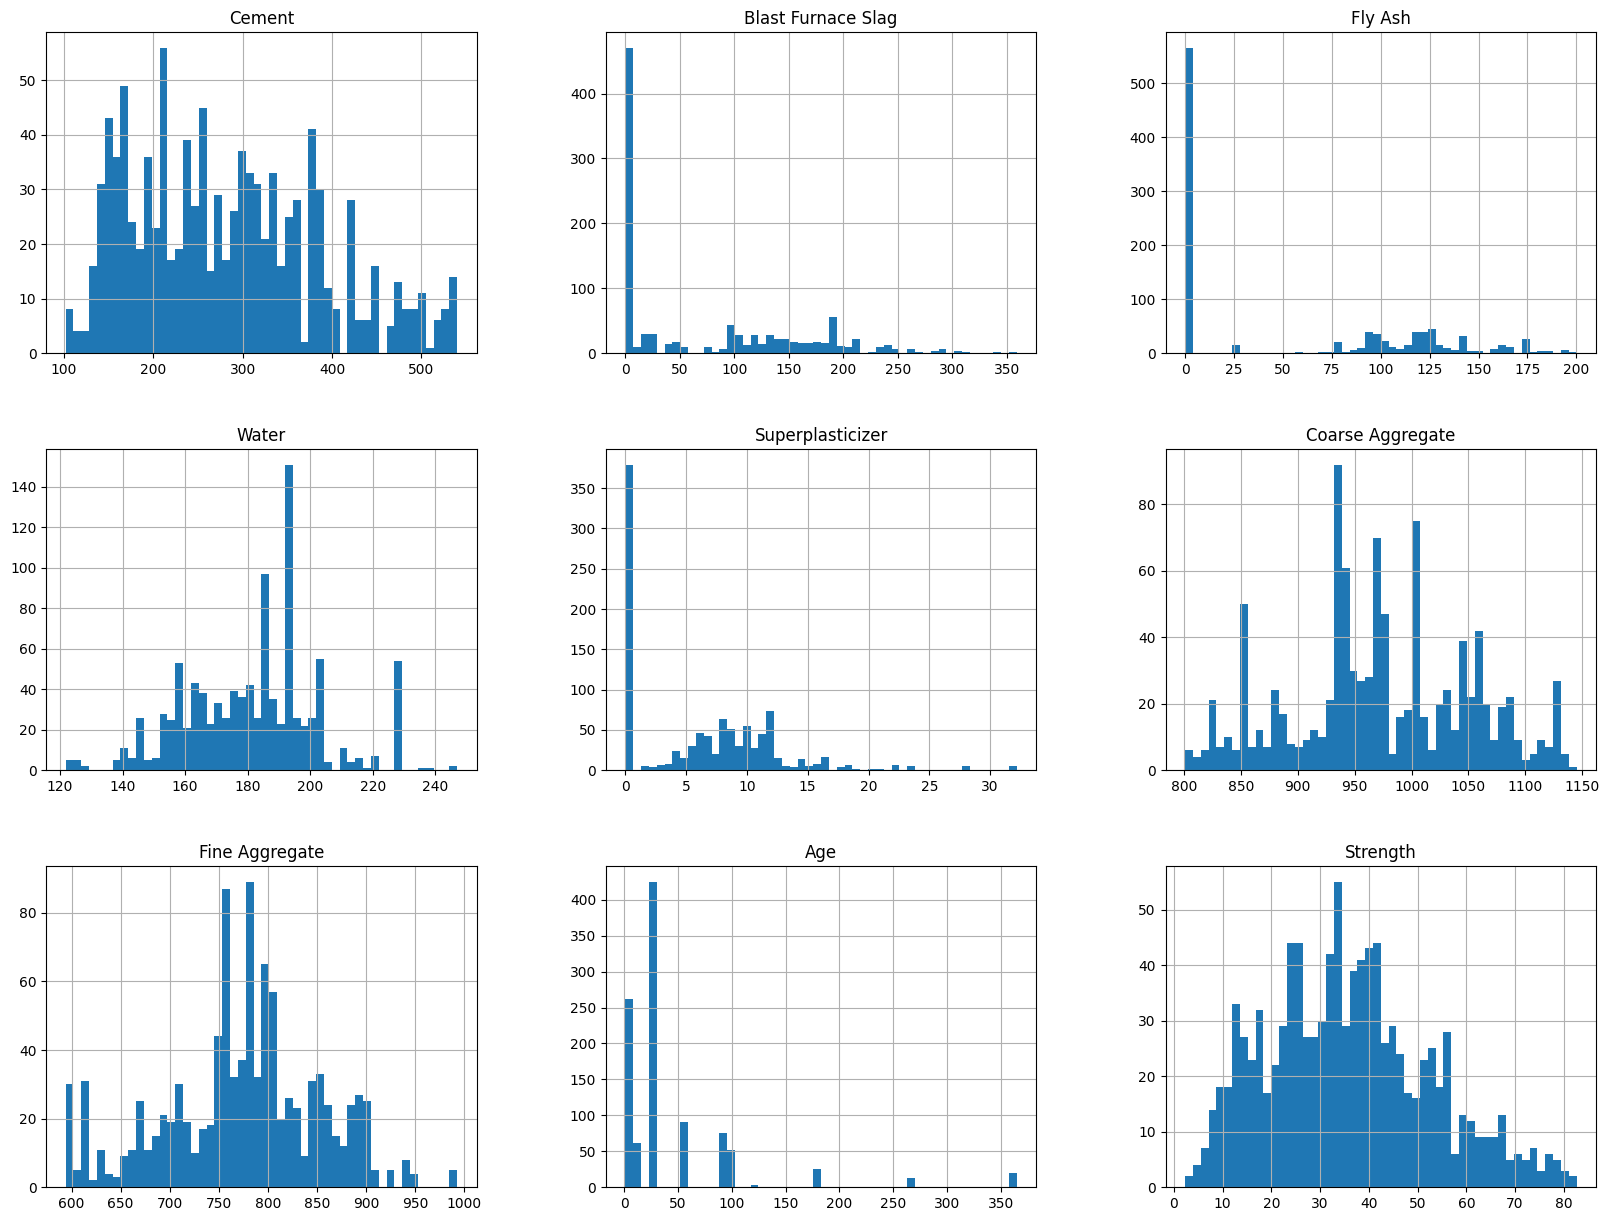

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
concrete_data.hist(bins=50, figsize=(20,15))

In [6]:
y = concrete_data['Strength']

In [7]:
concrete_data.drop("Strength", axis=1, inplace=True)

In [8]:
concrete_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.000000,0.000000,0.000000,162.000000,2.5,1040.000000,676.000000,28.0
1,540.000000,0.000000,0.000000,162.000000,2.5,1055.000000,676.000000,28.0
2,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,270.0
3,332.500000,142.500000,0.000000,228.000000,0.0,932.000000,594.000000,365.0
4,198.600006,132.399994,0.000000,192.000000,0.0,978.400024,825.500000,360.0
...,...,...,...,...,...,...,...,...
1025,276.399994,116.000000,90.300003,179.600006,8.9,870.099976,768.299988,28.0
1026,322.200012,0.000000,115.599998,196.000000,10.4,817.900024,813.400024,28.0
1027,148.500000,139.399994,108.599998,192.699997,6.1,892.400024,780.000000,28.0
1028,159.100006,186.699997,0.000000,175.600006,11.3,989.599976,788.900024,28.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    concrete_data, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
    # stratify=y
)

In [10]:
corr_matrix = X_train.corr()

In [11]:
corr_matrix["Superplasticizer"].sort_values(ascending=False)

Superplasticizer      1.000000
Fly Ash               0.365800
Fine Aggregate        0.217674
Cement                0.077144
Blast Furnace Slag    0.055439
Age                  -0.180280
Coarse Aggregate     -0.263028
Water                -0.653785
Name: Superplasticizer, dtype: float64